In [0]:
!ls

aclImdb_v1.tar.gz  keras_quickdraw.model  model
datalab		   mini_classes.txt	  model.zip


In [0]:
#install tqdm
!pip install tqdm

In [0]:
from google.colab import files
# upload sub-categories files
upload = files.upload()

Saving my_categories.txt to my_categories.txt


In [0]:
# load categories files
with open('my_categories.txt', 'r') as f:
    classes = f.readlines()
    #url的空白在編碼上是%20，先換成_到時侯在換回來
    classes = [ i.replace('\n','').replace(' ', '_') for i in classes]
print(len(classes))

168


In [0]:
!mkdir data

In [0]:
# download (.npy) file from dataset
import urllib.request
import os
def download():
    url = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
    for i in classes:
        if not os.path.isfile('data/' + i + '.npy'):
            download_url = url + i.replace('_', '%20') + '.npy'
            print('downloading:',download_url)
            urllib.request.urlretrieve(download_url, 'data/' + i + '.npy')
    print('total ', len(classes), 'files')
download()

downloading: https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
downloading: https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/alarm%20clock.npy
downloading: https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ambulance.npy
downloading: https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/angel.npy
downloading: https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ant.npy
downloading: https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/apple.npy
downloading: https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/arm.npy
downloading: https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/axe.npy
downloading: https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy
downloading: https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball.npy
downloading: https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/basket.

In [0]:
!ls data

airplane.npy	   cow.npy		keyboard.npy	school_bus.npy
alarm_clock.npy    crown.npy		key.npy		shark.npy
ambulance.npy	   cup.npy		knee.npy	sheep.npy
angel.npy	   diamond.npy		knife.npy	smiley_face.npy
ant.npy		   dog.npy		ladder.npy	snail.npy
apple.npy	   dolphin.npy		laptop.npy	snake.npy
arm.npy		   door.npy		leaf.npy	snorkel.npy
axe.npy		   dragon.npy		leg.npy		snowflake.npy
banana.npy	   dresser.npy		light_bulb.npy	snowman.npy
baseball.npy	   ear.npy		lighter.npy	soccer_ball.npy
basketball.npy	   elephant.npy		lighthouse.npy	sock.npy
basket.npy	   envelope.npy		line.npy	speedboat.npy
bat.npy		   eraser.npy		lion.npy	spider.npy
beach.npy	   eyeglasses.npy	mailbox.npy	spoon.npy
beard.npy	   eye.npy		map.npy		spreadsheet.npy
bear.npy	   face.npy		marker.npy	square.npy
bed.npy		   fan.npy		monkey.npy	stairs.npy
bee.npy		   finger.npy		moon.npy	star.npy
bicycle.npy	   fish.npy		mountain.npy	steak.npy
bird.npy	   flower.npy		mouse.npy	stitches.npy
birthday_cake.npy  foot.npy		mouth.npy	stop

## Load all data from files

In [0]:
import glob
from tqdm import tqdm
import numpy as np

sample_size = 3000
data_find_path = os.path.join('data', '*.npy')
#print(data_find_path)


all_files = glob.glob(data_find_path) #透過副檔名匹配找到所有符合的檔案

# initialize variables
x = np.empty([0, 784])
y = np.empty([0])
class_names = []

for idx, file in tqdm(enumerate(all_files)):
    data = np.load(file)
    data = data[0 : sample_size, :] #取出sample_size筆data
    labels = np.full(sample_size, idx) #根據idx命名labels

    x = np.r_[x, data]
    y = np.r_[y, labels]
    
    class_name, _ = os.path.splitext(os.path.basename(file)) #取出檔名
    class_names.append(class_name)

# free memory
data = None
labels = None

168it [03:08,  1.12s/it]


In [0]:
print(x.shape, y.shape)

(504000, 784) (504000,)


## Split data into training & testing data

In [0]:
from sklearn.model_selection import train_test_split
'''
#幹 自幹完才發現sklearn自帶shuffle參數

# shuffle data
# random.shuffle不會返回值，permutation參數如果是一個數字會返回[0, 數字]的亂數array
# 這樣就不用先合併xy，shuffle後再切開
shuffle_permutation_index = np.random.permutation(x.shape[0])
x = x[shuffle_permutation_index, :]
y = y[shuffle_permutation_index]
'''

#split data
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, shuffle = True)
print('training size:', X_train.shape[0], 'Testing size:', X_test.shape[0])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


training size: 403200 Testing size: 100800


## Visualization

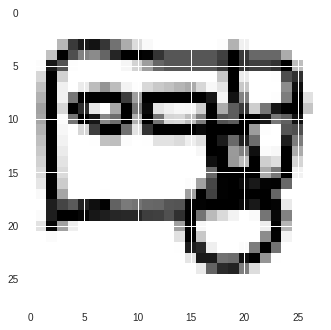

bus


In [0]:
import matplotlib.pyplot as plt
from random import randint
# 隨機印出一張圖片
idx = randint(0, len(X_train))
plt.imshow(X_train[idx].reshape(28, 28))
plt.show()
print(class_names[int(y_train[idx])])

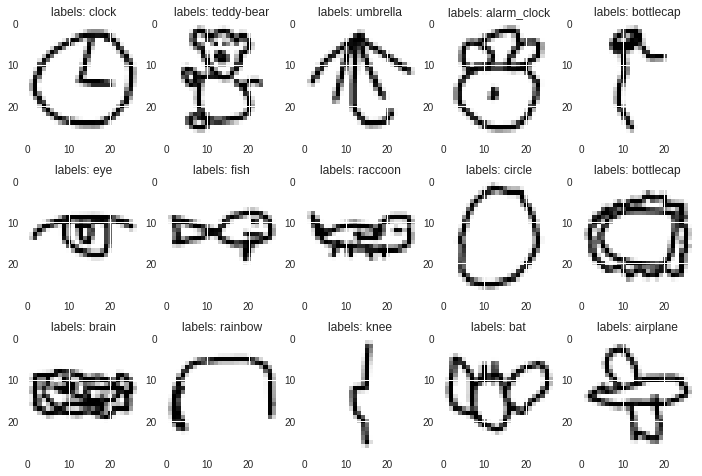

In [0]:
def plot_imgs_labels(x, y, prediction, num = 10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(x[i].reshape(28, 28))
        labels = class_names[int(y[i])]
        titles = 'labels: '+labels
        if len(prediction) > 0:
            titles += '\nprediction: '+class_names[int(prediction[i])]
        ax.set_title(titles)
plot_imgs_labels(X_train, y_train, [], 15)

## Training

In [0]:
from keras.utils import to_categorical
# reshape img size
X_train_reshape = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test_reshape = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Normalization
X_train_reshape_normalize = X_train_reshape / 255.0
X_test_reshape_normalize = X_test_reshape / 255.0

# One-hot encoding
y_train_one_hot = to_categorical(y_train, len(class_names))
y_test_one_hot = to_categorical(y_test, len(class_names))

In [0]:
X_train_reshape_normalize.shape[:]

(312000, 28, 28, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

#convolution layers
model.add(Convolution2D(16, (3, 3), 
                  padding='same', 
                  input_shape=X_test_reshape_normalize.shape[1:],
                  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

# full connection layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(len(class_names), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['top_k_categorical_accuracy'])
model.fit(X_train_reshape_normalize, y_train_one_hot, validation_split= 0.1, batch_size=256, verbose=2, epochs=5)

Train on 362880 samples, validate on 40320 samples
Epoch 1/5
 - 37s - loss: 2.6683 - top_k_categorical_accuracy: 0.6496 - val_loss: 1.8810 - val_top_k_categorical_accuracy: 0.8028
Epoch 2/5
 - 32s - loss: 1.8859 - top_k_categorical_accuracy: 0.8043 - val_loss: 1.6061 - val_top_k_categorical_accuracy: 0.8453
Epoch 3/5
 - 32s - loss: 1.6862 - top_k_categorical_accuracy: 0.8340 - val_loss: 1.4773 - val_top_k_categorical_accuracy: 0.8611
Epoch 4/5
 - 32s - loss: 1.5739 - top_k_categorical_accuracy: 0.8501 - val_loss: 1.3750 - val_top_k_categorical_accuracy: 0.8738
Epoch 5/5
 - 30s - loss: 1.4962 - top_k_categorical_accuracy: 0.8602 - val_loss: 1.3355 - val_top_k_categorical_accuracy: 0.8780


In [0]:
score = model.evaluate(X_test_reshape_normalize, y_test_one_hot, verbose=2)
score

[1.3277616614103318, 0.8802281746031746]

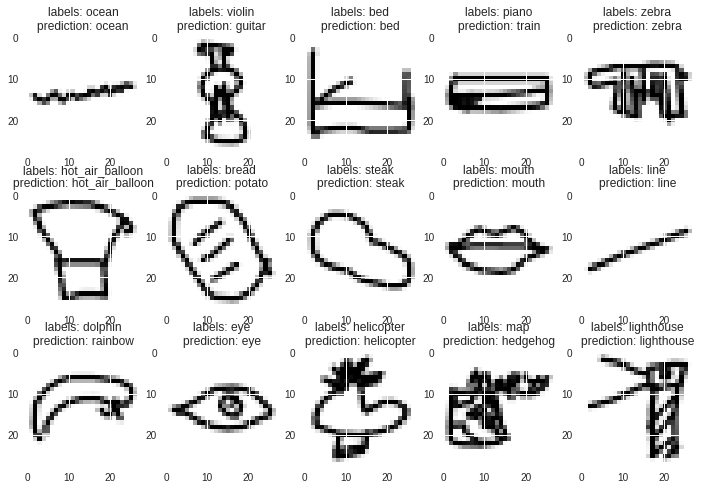

In [0]:
prediction = model.predict_classes(X_test_reshape_normalize[:15])
plot_imgs_labels(X_test, y_test, prediction, 15)

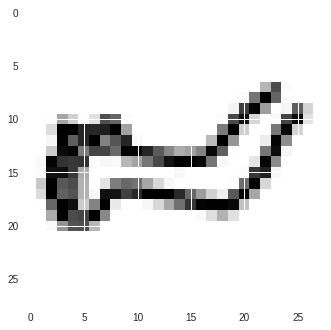

arm


['arm', 'speedboat', 'dolphin', 'shark', 'snake']

In [0]:
  # 隨機印出一張圖片，猜測前五項
idx = randint(0, len(X_test))
plt.imshow(X_test[idx].reshape(28, 28))
plt.show()
print(class_names[int(y_test[idx])])
pred = model.predict(X_test_reshape_normalize[idx : idx+1])
#print(pred)
k = 5
fir_k_categorical_idx = (-pred).argsort()[0][:k]
[ class_names[i] for i in fir_k_categorical_idx ]

In [0]:
# store class_names.txt
with open('class_names.txt', 'w') as file_handler:
    for item in class_names:
        file_handler.write("{}\n".format(item))

In [0]:
!rm model -r

## Install TensorFlowJS

In [0]:
!pip install tensorflowjs

In [0]:
model.save('keras_quickdraw.model')

In [0]:
!mkdir model

In [0]:
!tensorflowjs_converter --input_format keras keras_quickdraw.model model/

Using TensorFlow backend.


In [0]:
!cp class_names.txt model/class_names.txt

In [0]:
!zip -r model.zip model

updating: model/ (stored 0%)
updating: model/group5-shard1of1 (deflated 7%)
updating: model/group3-shard1of1 (deflated 7%)
updating: model/model.json (deflated 84%)
updating: model/group1-shard1of1 (stored 0%)
updating: model/group2-shard1of1 (deflated 7%)
updating: model/class_names.txt (deflated 44%)
updating: model/group4-shard1of1 (deflated 7%)
updating: model/group6-shard1of1 (deflated 7%)


In [0]:
from google.colab import files
files.download('model.zip')